In [1]:
%pylab inline
from analysis_toolbox import *
from qualityBaseline import *
import pandas as pd 

Populating the interactive namespace from numpy and matplotlib


In [2]:
bb_info = pd.read_csv('../../crowd-seg/analysis/computed_my_COCO_BBvals.csv')
obj_sorted_tbl =  bb_info[bb_info['Jaccard [COCO]']!=-1][bb_info['Jaccard [COCO]']!=0][bb_info['Jaccard [Self]']!=0].sort('object_id')
object_id_lst  = list(set(obj_sorted_tbl.object_id))

for objid in object_id_lst:

    # Ji_tbl (bb_info) is the set of all workers that annotated object i 
    bb_objects  = obj_sorted_tbl[obj_sorted_tbl["object_id"]==objid]

In [3]:
xylocs = [list(zip(*process_raw_locs([x,y]))) for x,y in zip(bb_objects["x_locs"],bb_objects["y_locs"])]

In [4]:
polygon_lst = []
for xyloc in xylocs:
    polygon_lst.append(Polygon(xyloc))

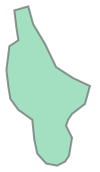

In [5]:
Polygon(xyloc)

In [6]:
from shapely.geometry import MultiPolygon

In [7]:
Ji_polygons = MultiPolygon(polygon_lst)
Ji_polygons_buffered = Ji_polygons.buffer(0.001)

In [8]:
img_info,object_tbl,bb_info,hit_info = load_info()

In [9]:
worker_lst = unique(bb_info.worker_id)
#Parameters: Priors
beta = 1
gamma = 1
theta = 1
# Hidden variables 
z = np.ones((len(img_info),50))# * x number of tasks, where * = 50 (number of coordinates in BB)
D = np.zeros((1,len(img_info)))# 1 x number of tasks
b = np.zeros((1,len(worker_lst)))# 1 x number of workers
c = np.zeros((1,len(worker_lst)))# 1 x number of workers

In [12]:
def abslogN(param):
    '''
    Drawing from normal distribution with prior (std) as param, with mean centered at 0
    log without nan; nan if value <0
    '''
    return log(abs(random.normal(0,param)))

In [24]:
loglikelihood=[]
logpD_lst =[]
#Loop through all task
for i in range(len(img_info)):
    #Loop through all workers
    worker_quality_prob=[]
    for j in range(len(worker_lst)):
        worker_quality_prob.append(abslogN(beta)+ abslogN(gamma))
    logpD = abslogN(theta)
    logpD_lst.append(logpD)
    logphiij_lst = []
    
    # Ji is the list of workers that annotated object i
    Ji = list(obj_sorted_tbl[obj_sorted_tbl["object_id"]==i].worker_id)
    for j in Ji : 
        phii=1
        mu = phii-b[j]
        sig = sqrt(w1*D[i]**2+w2*c**2)
        logphiij_lst.append(log(abs(random.normal(mu,sig))))
    logphiij = sum(logphiij_lst)
    loglikelihood.append(sum(worker_quality_prob)+logpD)
    

IndexError: index 199 is out of bounds for axis 0 with size 1

In [ ]:
#E step 

